<h3>Wine Quality Classification</h3>

<h4>Exploring xgboost by predicting wine quality</h4>
- Using the <a href="https://archive.ics.uci.edu/dataset/186/wine+quality?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python">Wine quality dataset on UCI Machine learning</a>

In [1]:
# importing tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing white wine dataset
white_df = pd.read_csv("wine+quality/winequality-white.csv", sep=";")
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_df.shape
# has 4898 rows & 12 columns

(4898, 12)

In [5]:
# importing the red wine dataset
red_df = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# add columns for white wine label
white_df["white_wine"] = 1
red_df["white_wine"] = 0

Concatenate the two dataframes using `pd.concat`

In [9]:
red_wine_df = pd.concat([red_df, white_df])
red_wine_df.shape

(6497, 13)

In [10]:
# shuffling data
wine_df = red_wine_df.sample(frac=1).reset_index(drop = True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white_wine
0,6.7,0.240,0.32,10.3,0.079,37.0,122.0,0.99662,3.02,0.45,8.8,5,1
1,9.4,0.685,0.26,2.4,0.082,23.0,143.0,0.99780,3.28,0.55,9.4,5,0
2,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,0
3,6.7,0.370,0.25,2.5,0.028,24.0,84.0,0.99090,3.14,0.36,11.7,6,1
4,6.2,0.210,0.18,11.6,0.044,61.0,155.0,0.99655,3.14,0.52,9.4,6,1


In [11]:
wine_df.shape

(6497, 13)

In [13]:
# exploring the dataset
# check for missing values
# There is no missing value in this instance
wine_df.isnull().values.any()

np.False_

In [14]:
# check the combination of white wine
wine_df["white_wine"].value_counts()

white_wine
1    4898
0    1599
Name: count, dtype: int64

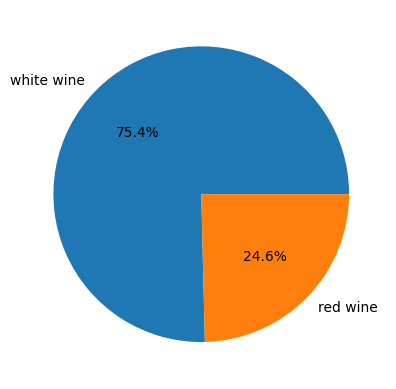

In [15]:
# pie chart to show the percentage breakdown of red vs white wine
wine_values = wine_df["white_wine"].value_counts().values
wine_labels = ["white wine", "red wine"]
plt.pie(wine_values, labels = wine_labels, autopct='%1.1f%%')
plt.show()

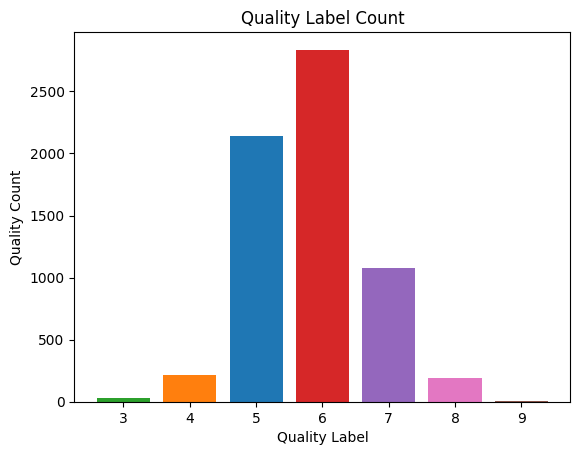

In [16]:
# visualizing the wine quality
fig, ax = plt.subplots()
quality_values = wine_df['quality'].value_counts().values
quality_labels = wine_df['quality'].value_counts().index
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:pink','tab:green', 'tab:brown']

ax.bar(quality_labels, quality_values, label=quality_labels, color= bar_colors)
ax.set_ylabel('Quality Count')
ax.set_xlabel('Quality Label')
ax.set_title('Quality Label Count')

plt.show()

- The dataset is imbalanced because some labels make up a large amount of the population which could cause overfitting
- In order to not have such an imbalanced dataset, let's split the quality in two buckets: the first bucket contains anything "6" or higher (that is, good quality) and the second bucket contains wine of lower quality with anything labeled "5" or lower.

In [17]:
wine_df['good_quality'] = [0 if x < 6 else 1 for x in wine_df['quality']]
wine_df['good_quality'].value_counts(normalize=True)

good_quality
1    0.633061
0    0.366939
Name: proportion, dtype: float64

Now we see that our dataset is more balanced with a 63% good quality and 37% poor quality dataset. Although there is still a minority class, it is better represented than our initial classes of "3"s and "9"s.

Now that we have a new target variable column, we can drop the numbered quality column in favor of the good_quality column we just created.

In [18]:
wine_df = wine_df.drop(["quality"], axis = 1)

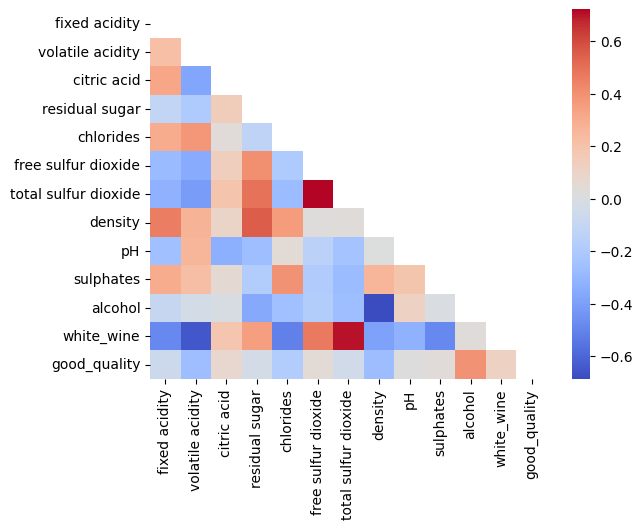

In [21]:
# visualize correlation
import numpy as np
mask = np.triu(np.ones_like(wine_df.corr()))
dataplot = sns.heatmap(wine_df.corr(), cmap="coolwarm", mask = mask)

In [22]:
# Train and evaluate model hyperparameters
# Split data into x and y
X = wine_df.drop(columns=["good_quality"], axis = 1)
y = wine_df["good_quality"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)
y_train.value_counts(normalize=True)

good_quality
1    0.633165
0    0.366835
Name: proportion, dtype: float64

In [26]:
y_test.value_counts(normalize=True)

good_quality
1    0.632821
0    0.367179
Name: proportion, dtype: float64

In [27]:
# import xgboost library
import xgboost as xgb
# convert test and train datasets into xgboost DMatrix
dmatrix_train = xgb.DMatrix(data=X_train, label = y_train)
dmatrix_test = xgb.DMatrix(data= X_test, label = y_test)

In [31]:
learning_objective = {'objective':'binary:logistic' } 
model = xgb.train(params = learning_objective, dtrain= dmatrix_train)

In [35]:
# use accuracy_score to check overall accuracy.
# Accuracy is calculated manually using the confusion matrix
# it's formula is (TP + TN) / (TP + FP + TN + FN)
pred_test = model.predict(dmatrix_test)
round_test_preds = [round(p) for p in pred_test]
from sklearn.metrics import accuracy_score
accuracy_score(y_test, round_test_preds)

0.7794871794871795

In [36]:
# Tuning hyperparameters using GridSearchCV
# creating parameters dict
params_grid = {
    "learning_rate": [0.01, 0.05],
    "gamma": [0, 0.01],
    "max_depth": [6, 7],
    "min_child_weight": [1, 2,3],
    "subsample": [0.6, 0.7],
    "n_estimators": [400, 600, 800]
}

In [37]:
# Define xgb classifier
classifier = xgb.XGBClassifier()

In [38]:
# fit GridSearchCV with the classifier, with 5 folds
from sklearn.model_selection import GridSearchCV
grid_classifier = GridSearchCV(classifier, params_grid, scoring = "accuracy", cv = 5)
grid_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.01], 'learning_rate': [0.01, 0.05],
                         'max_depth': [6, 7], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [400, 600, 800],
                         'subsample': [0.6, 0.7]},
             scoring='accuracy')

In [40]:
# print out best parameters
best_params = grid_classifier.best_params_
best_params

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 400,
 'subsample': 0.7}

In [44]:
grid_test_preds = grid_classifier.predict(X_test)
grid_test_preds

array([1, 0, 0, ..., 0, 1, 1])

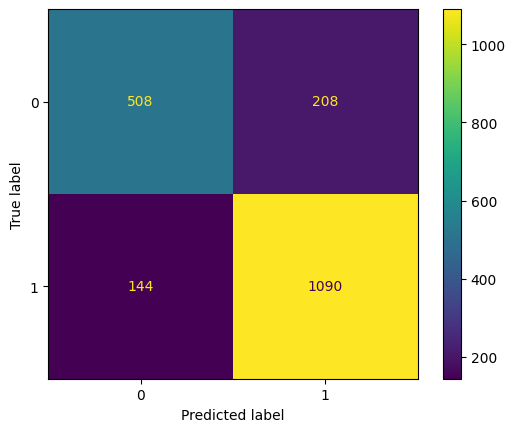

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, grid_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_classifier.classes_)
disp.plot()
plt.show()

In [46]:
# check grid accuracy
grid_test_accuracy = accuracy_score(y_test, grid_test_preds)
grid_test_accuracy

0.8194871794871795